This is one of the competition in Kaggle called the "Titanic: Machine Learning from Disaster".

The link of the competition can be found [here](https://www.kaggle.com/c/titanic)

# Importing Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
print("Setup Complete")

Setup Complete


In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Here we are trying to classify whether the passenger in the test_data file survive titanic or not.

# Data Cleaning
We have to check our data for missing values.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As we can see from both test_data and train_data, the columns "Age" and "Cabin" seems to have quite problematic number of missing values. Since "Age" is a pretty powerful metric to be taken into account in our model, we will have to somehow impute the value. In the test_data, we have "Embarked", "Cabin", "Age", and "Fare" for the missing values. On the other hand, train_data have "Age", "Cabin", and "Embarked". We will take a look at these missing values  eventualy.

Now we will see the percentage of people who survived from the train_data

In [7]:
train_data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

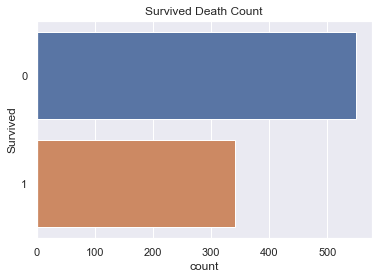

In [8]:
g = sns.countplot(y = train_data["Survived"]).set_title("Survived Death Count")

We see that the proportion of people who survived titanic is 0.616 and the proportion of people who died is 0.384.

# Feature Analysis

When doing feature analysis, our goal is to get a better understanding of our data before we actually fit the classification model of our choice. This is also part of the Exploratory Data Analysis.

## Sex

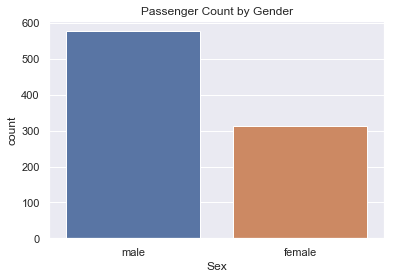

In [9]:
a = sns.countplot(x = train_data["Sex"]).set_title("Passenger Count by Gender")

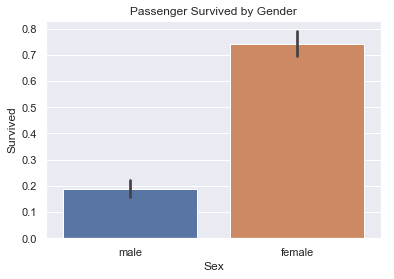

In [10]:
b = sns.barplot(x = "Sex", y = "Survived", data = train_data).set_title("Passenger Survived by Gender")

One insight that we can draw from the above is **Female Passenger are more likely to survive than Male Passenger** 

## Pclass

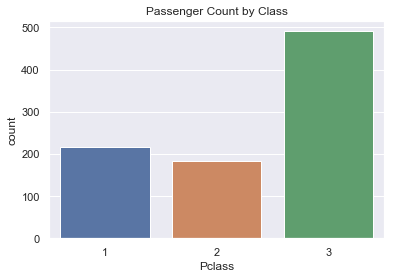

In [11]:
a = sns.countplot(x="Pclass", data=train_data).set_title("Passenger Count by Class")

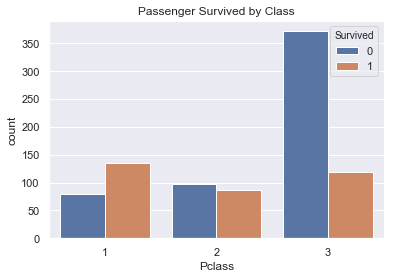

In [12]:
b = sns.countplot(x = train_data["Pclass"], hue=train_data["Survived"]).set_title("Passenger Survived by Class")

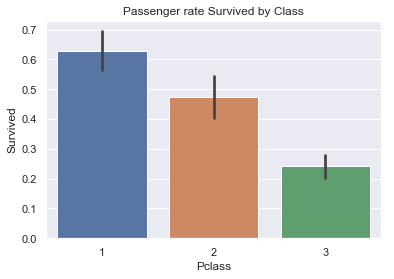

In [13]:
c = sns.barplot(x="Pclass", y="Survived", data=train_data).set_title("Passenger rate Survived by Class")

As we can see despite the big number of passenger with Pclass = 3, its survival rate is much lower than people with Pclass 1 and 2 (pclass3 = 0.24, pclass2 = 0.47, and pclass1 = 0.625). One of possible reason is because most people with Pclass = 1 and 2 are the people of higher rank and this fact will definitely boost their survival rate up.

We will also see the proportion of passenger who survived by Pclass and Sex

In [14]:
train_data.groupby(["Pclass", "Sex"]).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

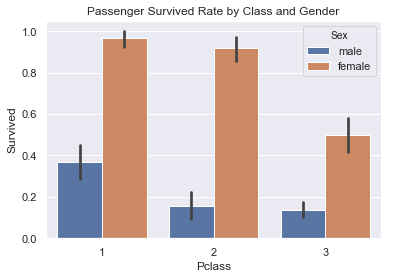

In [15]:
d = sns.barplot(x="Pclass", y="Survived", hue="Sex", 
                data=train_data).set_title("Passenger Survived Rate by Class and Gender")

Seems like no matter what class they're in it is still consistent that people prioritize the survival rate of women first rather than men.

## Age
We will look at the Age distribution for the passenger

In [16]:
train_data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

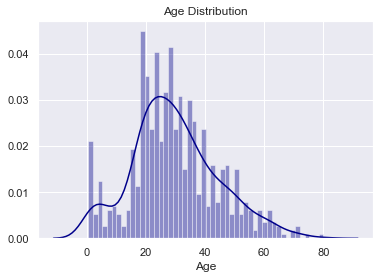

In [17]:
a = sns.distplot(train_data["Age"], bins = 50, color = "darkblue").set_title("Age Distribution")

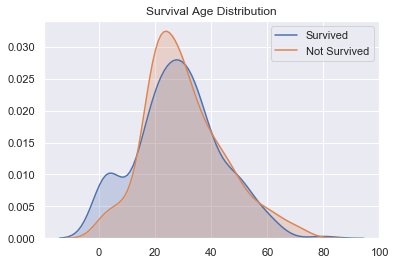

In [18]:
b = sns.kdeplot(train_data["Age"].loc[train_data["Survived"] == 1], shade = True, label = "Survived")
b = sns.kdeplot(train_data["Age"].loc[train_data["Survived"] == 0],
                shade = True, label = "Not Survived").set_title("Survival Age Distribution")

The shape of the Survival rate of age and the age distribution looks quite similar and the mean of age is below 30. We also notice that passenger with small age (0-8 years) is also likely to survive.

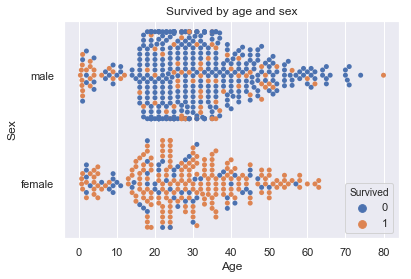

In [19]:
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

In this plot, we can see the bulk of the age distribution who survived grouped by gender.

## Fare

In [20]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

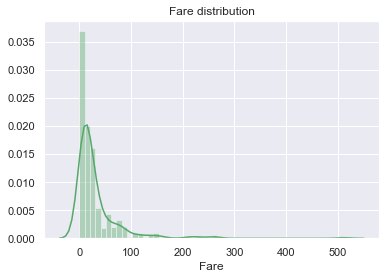

In [21]:
a = sns.distplot(train_data.Fare, color='g').set_title('Fare distribution')

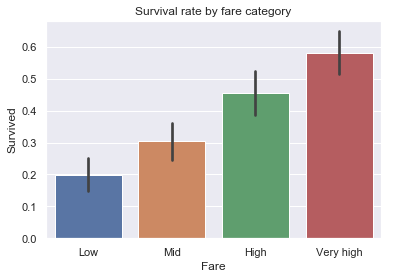

In [22]:
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])

b = sns.barplot(x=fare_ranges, y=train_data.Survived).set_title("Survival rate by fare category")

## Embarked

In [23]:
# for i in range (len(train_data["Embarked"])) :
#     if train_data["Embarked"][i] == "C":
#         train_data["Embarked"][i] = "Cherbourg"
#     elif train_data["Embarked"][i] == "S":
#         train_data["Embarked"][i] = "Southampton"
#     else:
#         train_data["Embarked"][i] = "Queenstown"

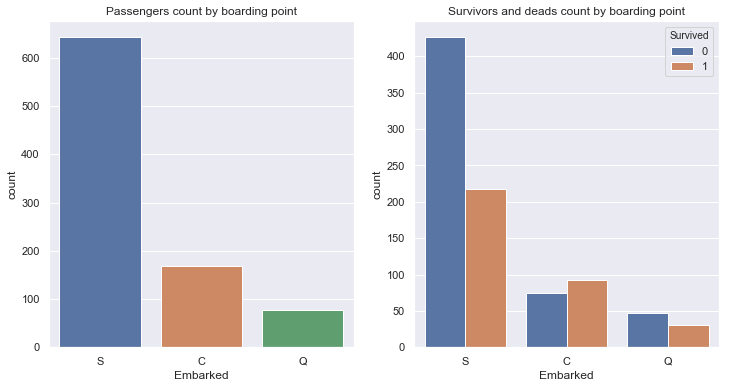

In [24]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

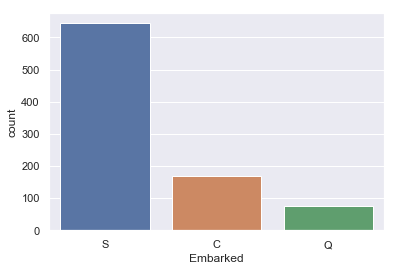

In [25]:
sns.countplot(x=train_data["Embarked"])

## Name
Engineer a new feature from passenger title

In [26]:
train_data["Title"] = train_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data["Title"] = test_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
train_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Jonkheer          1
Sir               1
Ms                1
Lady              1
Capt              1
the Countess      1
Don               1
Name: Title, dtype: int64

In [29]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

We might want to categorize miss and mr to be the main identifier for our feature

In [30]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [31]:
train_data.groupby("Title").Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

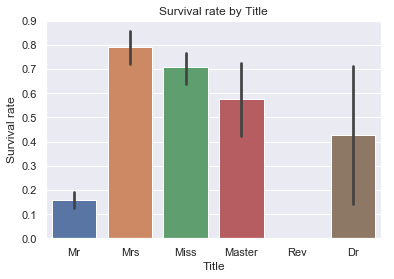

In [32]:
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', data=train_data).set_ylabel('Survival rate')

## SibSp

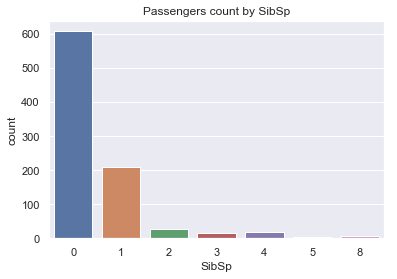

In [35]:
a = sns.countplot(train_data['SibSp']).set_title('Passengers count by SibSp')

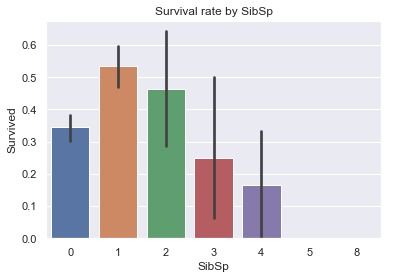

In [36]:
b = sns.barplot(x='SibSp', y='Survived', data=train_data).set_title('Survival rate by SibSp')

Big family are less likely to survive for some reasons. Survival rate for this is a bit confusing though.

## Parch

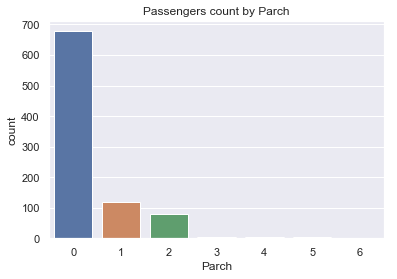

In [37]:
a = sns.countplot(train_data['Parch']).set_title('Passengers count by Parch')

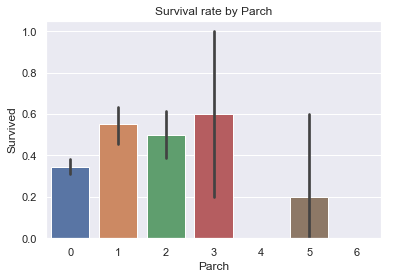

In [38]:
b = sns.barplot(x='Parch', y='Survived', data=train_data).set_title('Survival rate by Parch')

Similar to SibSp

## Family Type
We make a new feature by combining SibSp and Parch

In [40]:
train_data["Fam_size"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["Fam_size"] = test_data["SibSp"] + test_data["Parch"] + 1

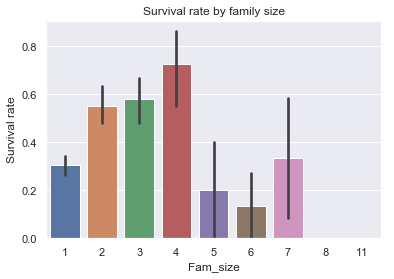

In [41]:
plt.title('Survival rate by family size')
g = sns.barplot(x=train_data.Fam_size, y=train_data.Survived).set_ylabel('Survival rate')

Divide the family size into four main groups

In [42]:
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

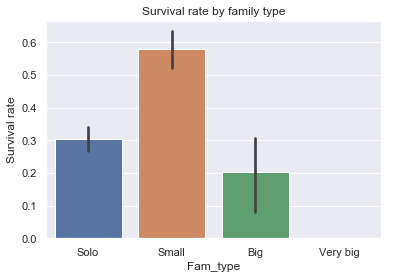

In [43]:
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')

# Model

First, we have to determine which feature that we are going to use for our model.
This time I will exclude "Cabin and Ticket" and "Age" for a reason that they probably will not be as impactful as the other feature. But we can always go back to those tinker with those feature to make it meaningful. 

In [44]:
y = train_data["Survived"]
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'Fam_type'] #Sibsp + Parch becomes Fam_type
X = train_data[features]
X.head()

,Pclass,Sex,Fare,Title,Embarked,Fam_type
0,3,male,7.2500,Mr,S,Small
1,1,female,71.2833,Mrs,C,Small
2,3,female,7.9250,Miss,S,Solo
3,1,female,53.1000,Mrs,S,Small
4,3,male,8.0500,Mr,S,Solo


### Dealing with Missing Values

In [45]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'Fam_type']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.827


In [46]:
X_test = test_data[features]
X_test.head()

,Pclass,Sex,Fare,Title,Embarked,Fam_type
0,3,male,7.8292,Mr,Q,Solo
1,3,female,7.0000,Mrs,S,Small
2,2,male,9.6875,Mr,Q,Solo
3,3,male,8.6625,Mr,S,Solo
4,3,female,12.2875,Mrs,S,Small


In [47]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

In [48]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
